In [1]:
%matplotlib widget
import numpy as np
import json, h5py, copy, os, glob, time, pickle
from matplotlib import pyplot as plt
from matplotlib import cm, dates
from scipy.optimize import curve_fit
from scipy.stats import pearsonr
from IPython.display import clear_output, display

from alvra_tools.load_data import *
from alvra_tools.channels import *
from alvra_tools.aux_functions import *
from alvra_tools.utils import *
from alvra_tools.XAS_functions import *

import warnings
warnings.filterwarnings('ignore')

## check BS channel(s) in a single acquisition

The file is already converted, setting processing parameters has no effect.
No gain/pedestal files are loaded.
Processing: run0025-paphy_light_5ps_batch3_3
Acquisition: acq0010

--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet   2001 / 2001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS122:INTENSITY 2001 / 2001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 2001 / 2001 -> 0% loss
complete channels: 2 / 2 -> 0% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 100.0 Hz
Laser rep rate is 9.090909090909092 Hz (delayed or dark)
Pump scheme is 10:1
Loaded 1819 pump and 182 unpump shots
------------------------------------------
Plot 1819 shots


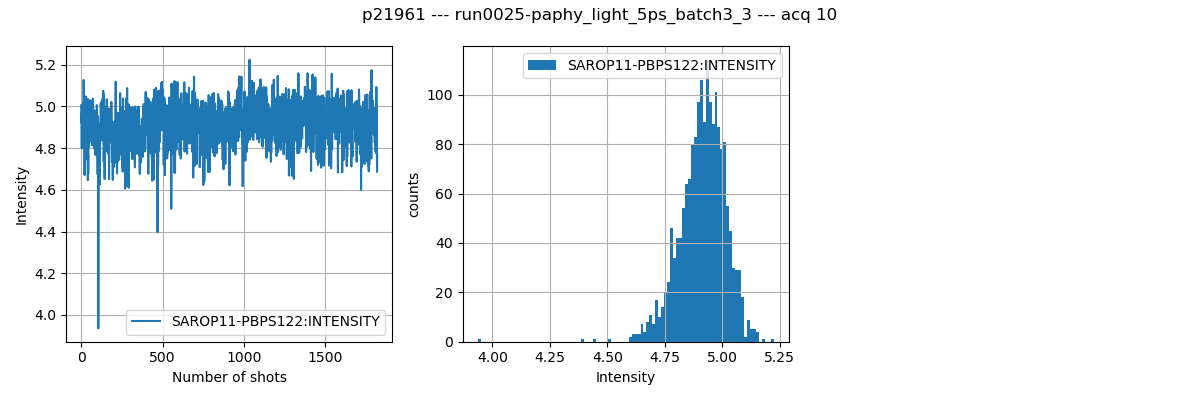

In [73]:
pgroup = 'p21961'
run = 25
#channel = [channel_diode_1, channel_diode_2]
channel = [channel_Izero122]
acq = 10
pp = True

data,title = check_BSchannel(pgroup, run, channel, acq, pp)
plot_checkedBSchannel(data,title)
#plot_checkedBSchannel_2D(data,title)
print ('------------------------------------------')
print ('Plot {} shots'.format(np.shape(data)[1]))

## check single channel for a full run

The file is already converted, setting processing parameters has no effect.
No gain/pedestal files are loaded.
Processing: run0017-paphy_dark_batch2_1
Acquisition: acq0033

--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet   2001 / 2001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS122:INTENSITY 2001 / 2001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 2001 / 2001 -> 0% loss
complete channels: 2 / 2 -> 0% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 100.0 Hz
Laser rep rate is 100.0 Hz (delayed or dark)
Pump scheme is 0:1
Loaded 0 pump and 2001 unpump shots
------------------------------------------
Plot 66033 shots


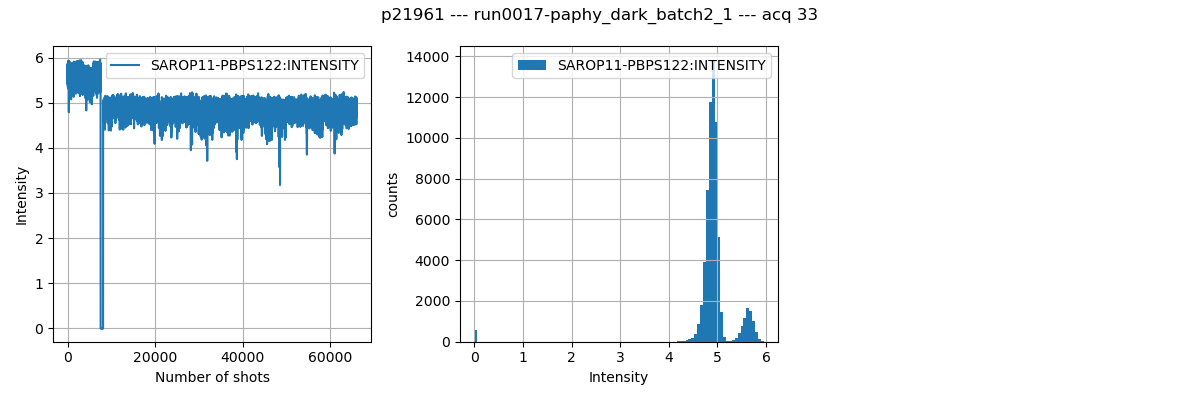

In [97]:
pgroup = 'p21961'
run = 17
channel = [channel_Izero122]
pp = False

###########################################################################

jsonfile = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, run))[0]
scan = SFScanInfo(jsonfile)
acqlist = np.arange(1, len(scan.files))
ch = []
for acq in acqlist:
    clear_output(wait=True)
    data, title = check_BSchannel(pgroup, run, channel, acq, pp)
    ch.extend(np.array(np.squeeze(data), dtype=object))
    ch2plot = np.reshape(ch, (1,-1))

plot_checkedBSchannel(ch2plot,title)
print ('------------------------------------------')
print ('Plot {} shots'.format(len(ch)))

## check single channel for multiple runs

The file is already converted, setting processing parameters has no effect.
No gain/pedestal files are loaded.
Processing: run0138-photolyase_test_withoutround
Acquisition: acq0016

--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet   2001 / 2001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS122:INTENSITY 2001 / 2001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 2001 / 2001 -> 0% loss
complete channels: 2 / 2 -> 0% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 100.0 Hz
Laser rep rate is 100.0 Hz (delayed or dark)
Pump scheme is 0:1
Loaded 0 pump and 2001 unpump shots
------------------------------------------
125 runs, plot 6889633 shots


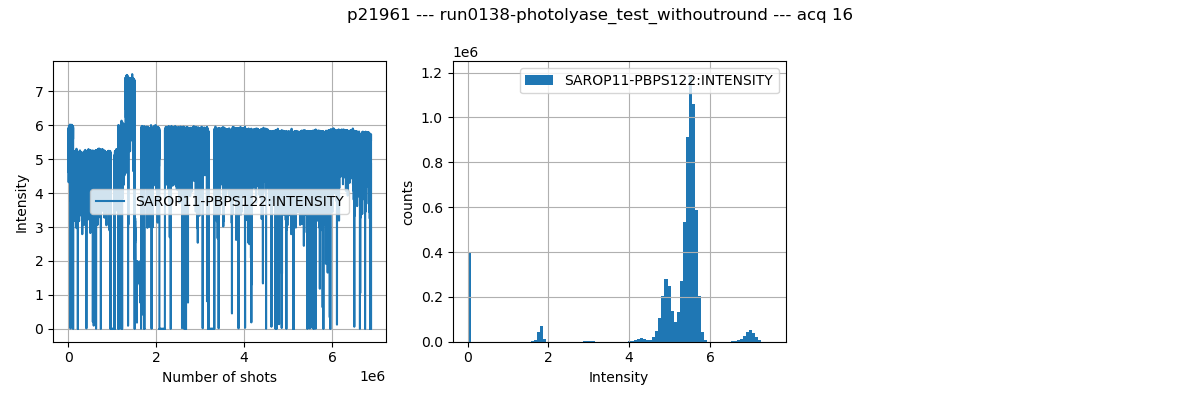

In [176]:
pgroup = 'p21961'
runlist = np.arange(14, 139)
channel = [channel_Izero122]
pp = False
savedata = True

###########################################################################
ch_all = []
shots = [0]
for run in runlist:
    jsonfile = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, run))[0]
    scan = SFScanInfo(jsonfile)
    acqlist = np.arange(1, len(scan.files))
    ch = []
    for acq in acqlist:
        clear_output(wait=True)
        data, title = check_BSchannel(pgroup, run, channel, acq, pp)
        ch.extend(np.array(np.squeeze(data), dtype=object))
        ch2plot = np.reshape(ch, (1,-1))
    shots.append(len(ch))
    ch_all.extend(ch)
shots = np.cumsum(np.array(shots))
ch2plot = np.reshape(ch_all, (1,-1))
plot_checkedBSchannel(ch2plot,title)
if savedata:
    reducedir = '/sf/alvra/data/{}/work/Reduced_data/'.format(pgroup)
    run_name = 'Izero_allRuns'
    os.makedirs(reducedir, exist_ok=True)
    data = {}
    data ={'{}'.format(channel): ch_all, "shot_number": shots, "runlist": runlist}
    with open(reducedir+run_name+'_data.pkl', 'wb') as f:
        pickle.dump(data, f)
print ('------------------------------------------')
print ('{} runs, plot {} shots'.format(len(runlist), len(ch_all)))

In [12]:
channel = [channel_Izero122]

with open('/sf/alvra/data/p21961/work/emma/Reduced_data/Izero_allRuns_data.pkl', 'rb') as f:
    data = pickle.load(f)
print (data.keys())    
runlist = data['runlist'][:]
ch_all = data['{}'.format(channel)][:]
shots = data['shot_number'][:]

dict_keys(["['SAROP11-PBPS122:INTENSITY']", 'shot_number', 'runlist'])


In [27]:
runs_per_plot = 10
##########################################################
shots_bins =[shots[i:i+runs_per_plot] for i in range(0,len(shots),runs_per_plot)]
runlist_bins = [runlist[i:i+runs_per_plot] for i in range(0,len(runlist),runs_per_plot)]

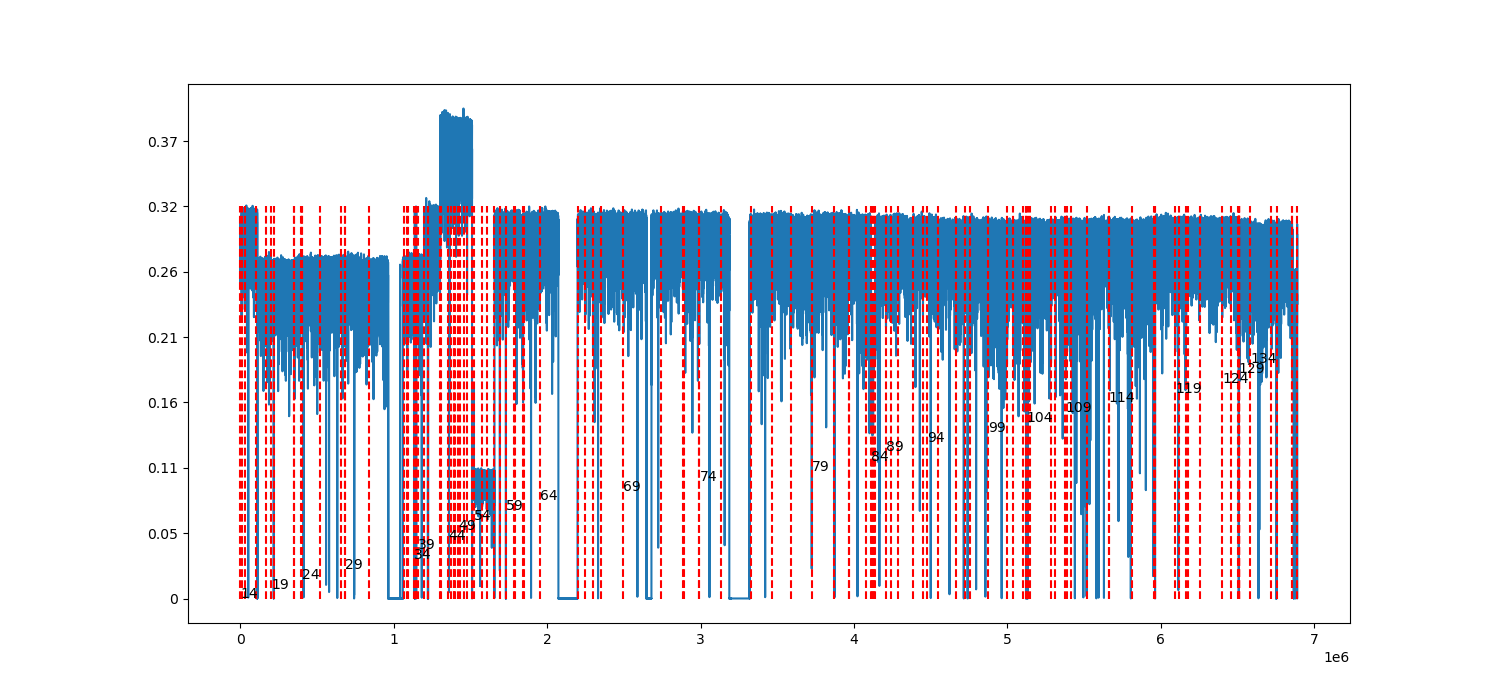

In [13]:
plt.figure(figsize=(15, 7))
plt.plot(ch_all)
yaxis = np.arange(0,8)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7], [0, 0.05, 0.11, 0.16, 0.21, 0.26, 0.32, 0.37])
plt.vlines(x=shots, ymin=0, ymax=6, linestyles='dashed', color = 'red')
for i,run in enumerate(runlist):
    if i%5==0:
        plt.text(x=shots[i], y=i*0.03, s=run)
plt.show()
plt.tight_layout()
plt.savefig('/sf/alvra/data/p21961/work/emma/Reduced_data/Fig_all.PNG')

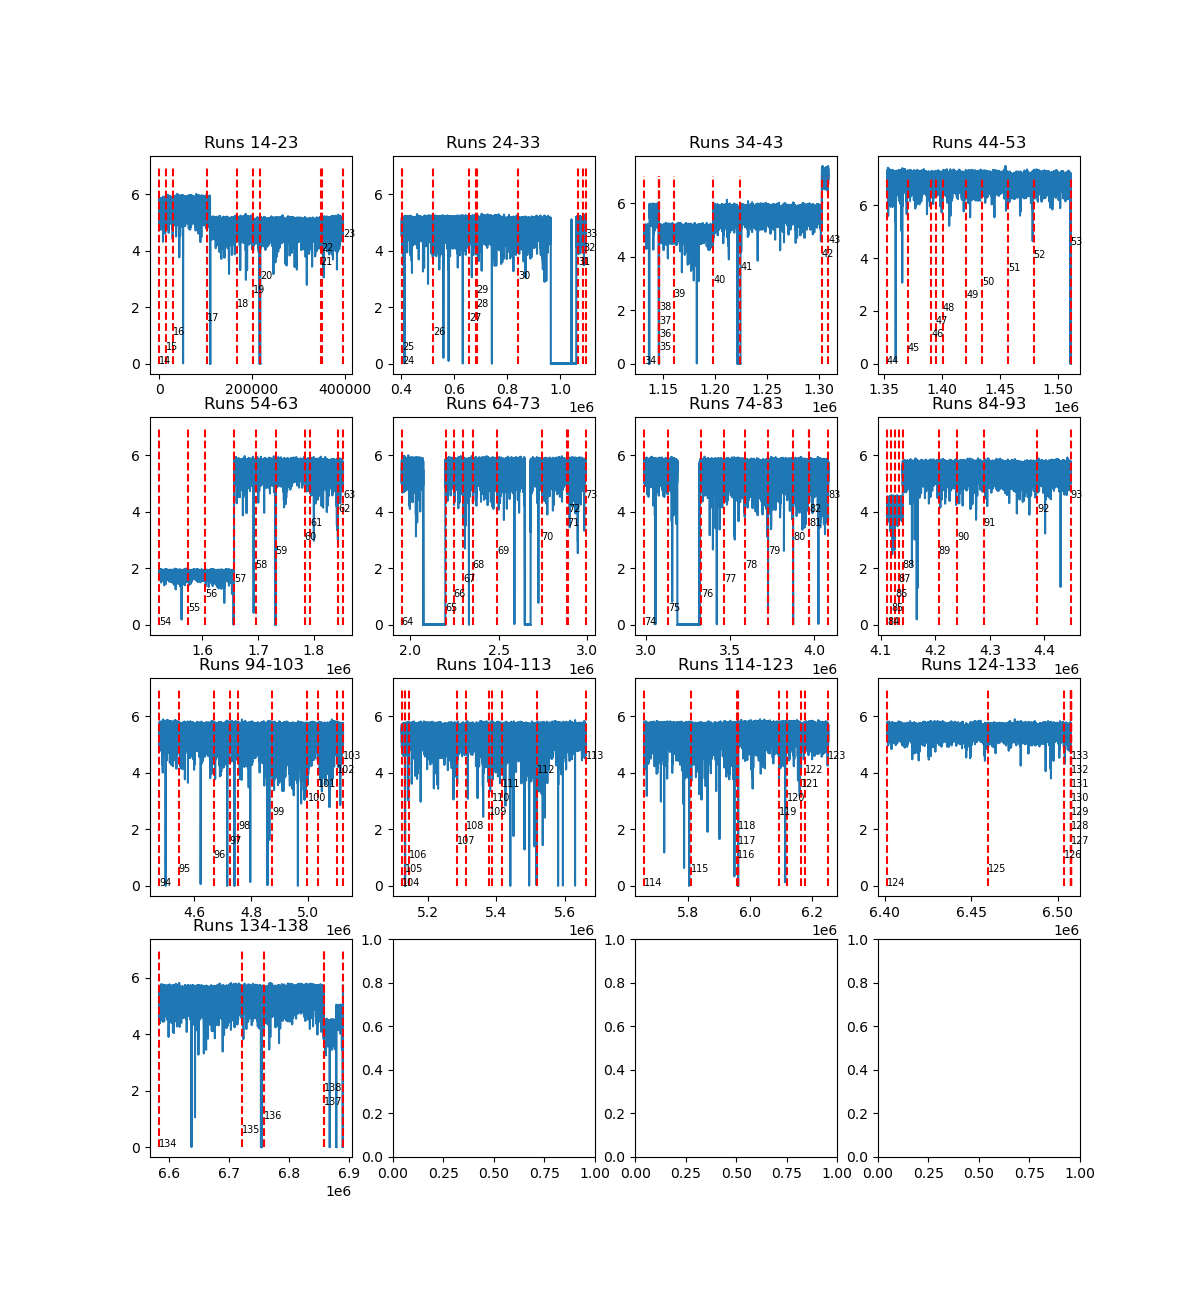

In [28]:
import math
i,j=0,0
plot_per_row = 4
fig, axs = plt.subplots(math.ceil(len(shots_bins)/plot_per_row), plot_per_row, figsize=(12, len(runlist_bins)), squeeze=False)
for index, shot in enumerate(shots_bins):
    xaxis = np.arange(shot[0], shot[-1])
    #axs[i][j].set_yticks([0, 1, 2, 3, 4, 5, 6, 7], [0, 0.05, 0.11, 0.16, 0.21, 0.26, 0.32, 0.37])
    axs[i][j].set_title('Runs {}-{}'.format(runlist_bins[index][0], runlist_bins[index][-1]))
    axs[i][j].plot(xaxis, ch_all[shot[0]:shot[-1]])
    axs[i][j].vlines(x=shot, ymin=0, ymax=7, linestyles='dashed', color = 'red')
    for idx, run in enumerate(runlist_bins[index]):
        axs[i][j].text(x=shot[idx], y=0.5*idx, s=run, fontsize=7)
    extent = axs[i][j].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    #fig.savefig('/sf/alvra/data/p21961/work/Claudio/PNG/Fig_range_{}_{}.PNG'.format(runlist_bins[index][0], runlist_bins[index][-1]),  bbox_inches=extent)
    j+=1
    if j%plot_per_row==0:
        i+=1
        j=0
plt.show()
plt.tight_layout()

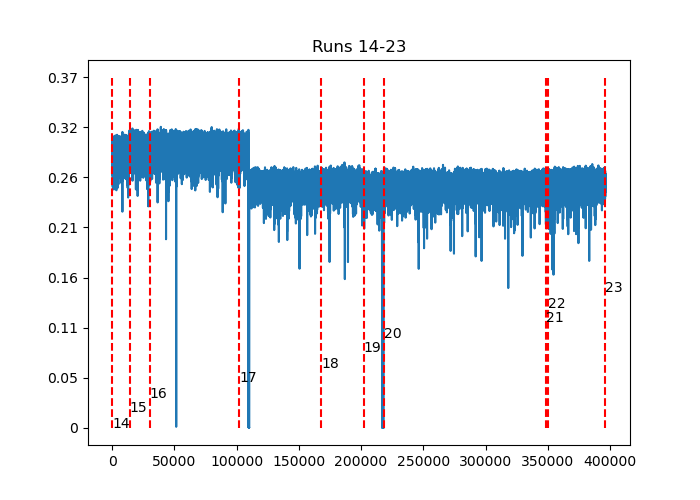

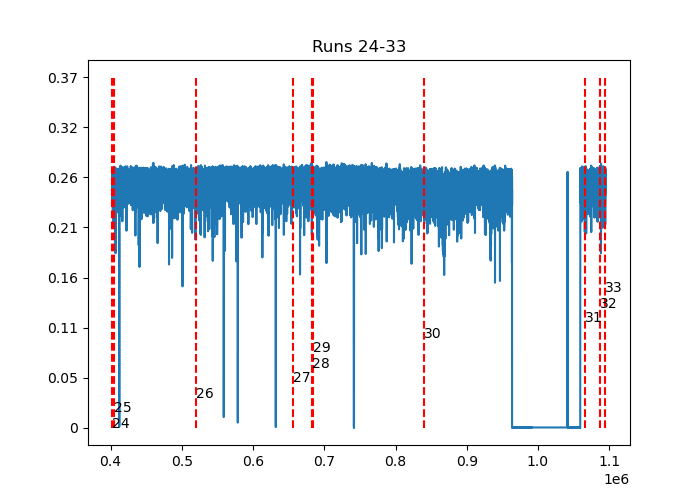

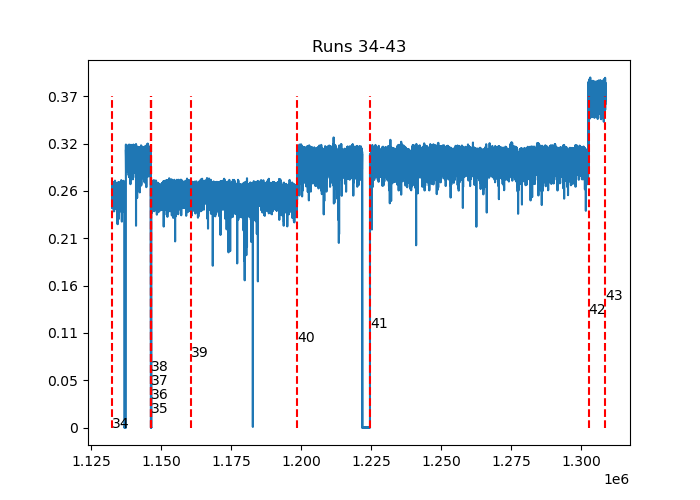

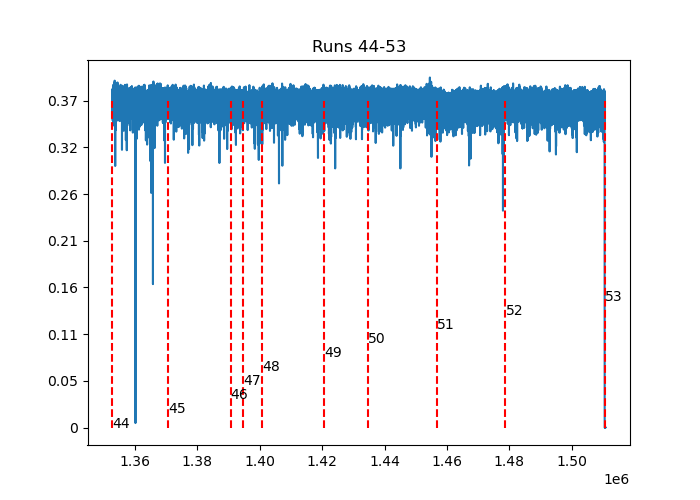

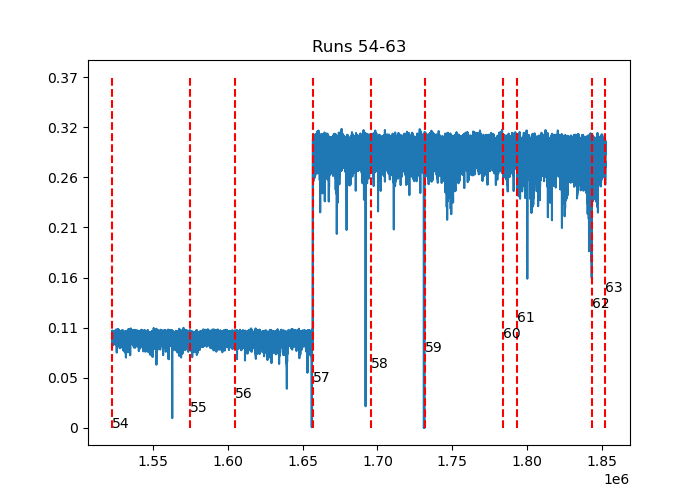

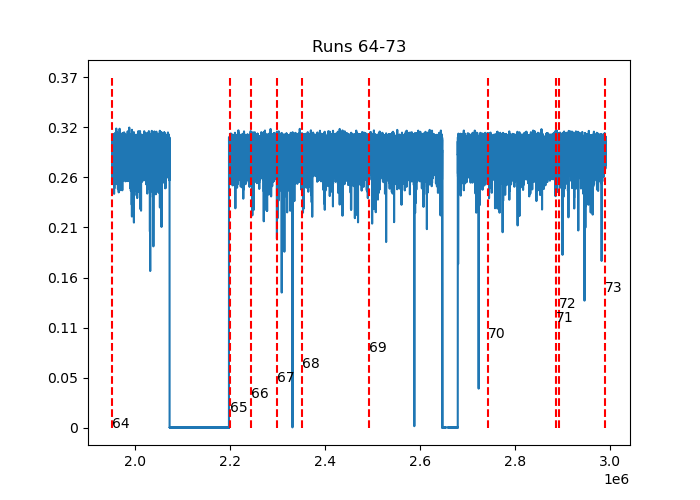

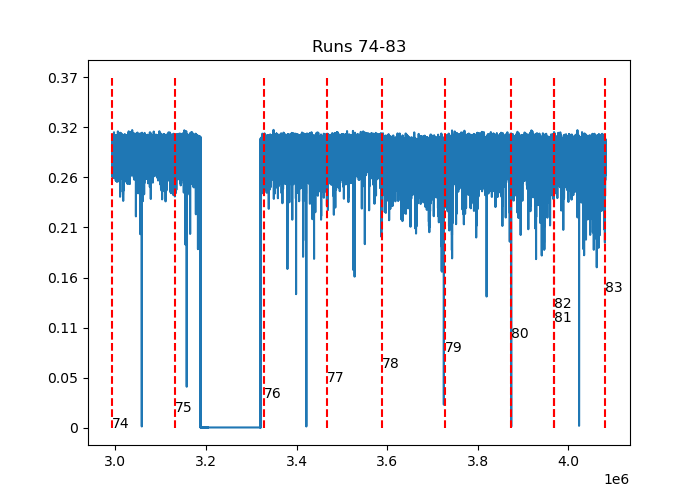

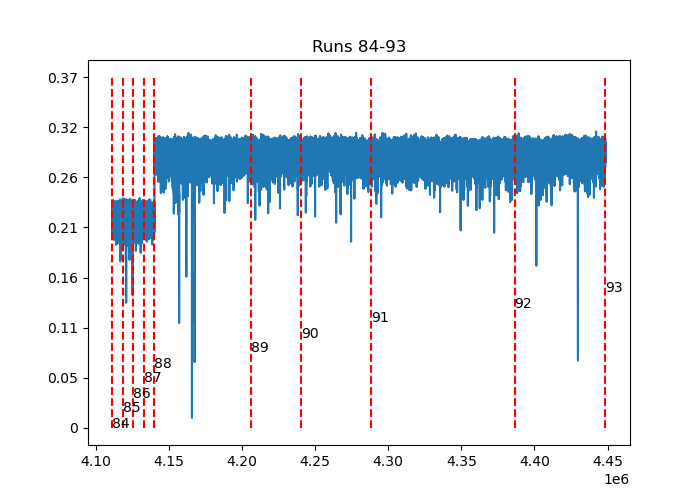

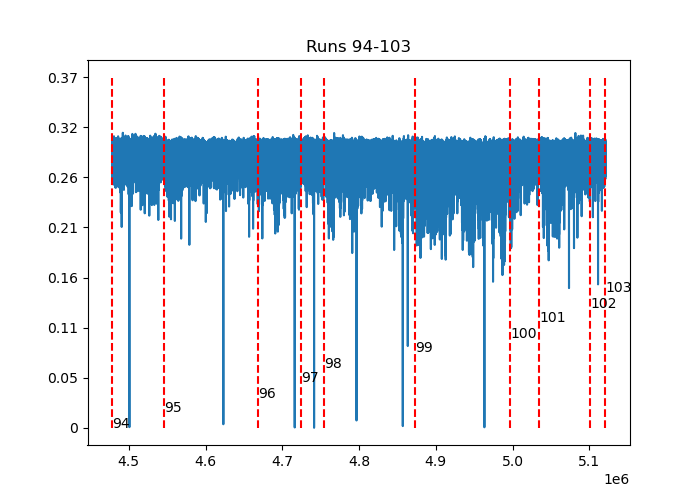

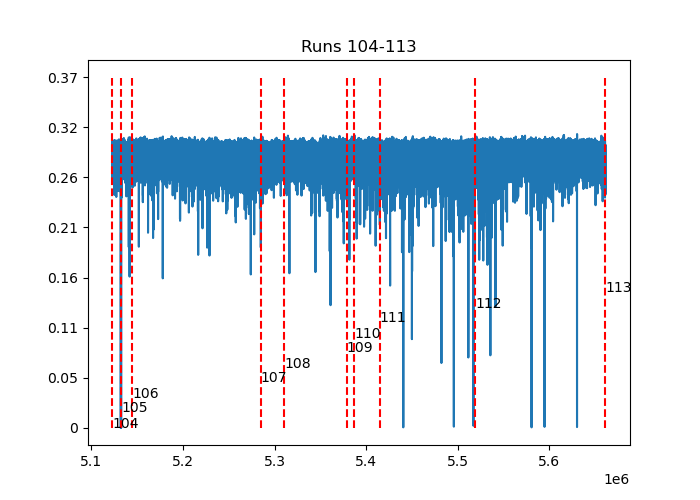

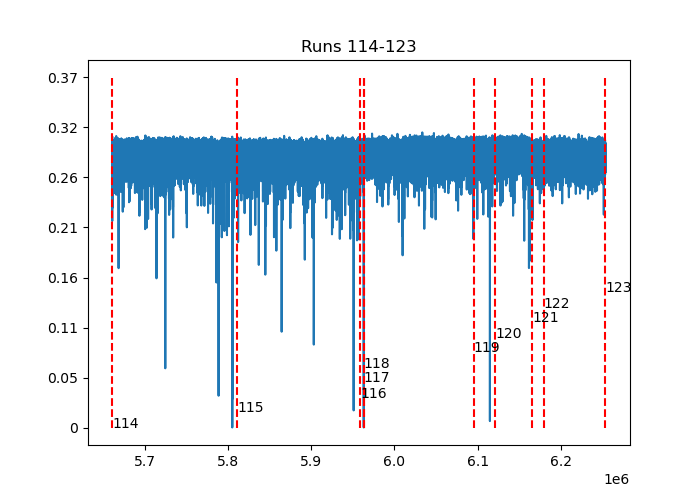

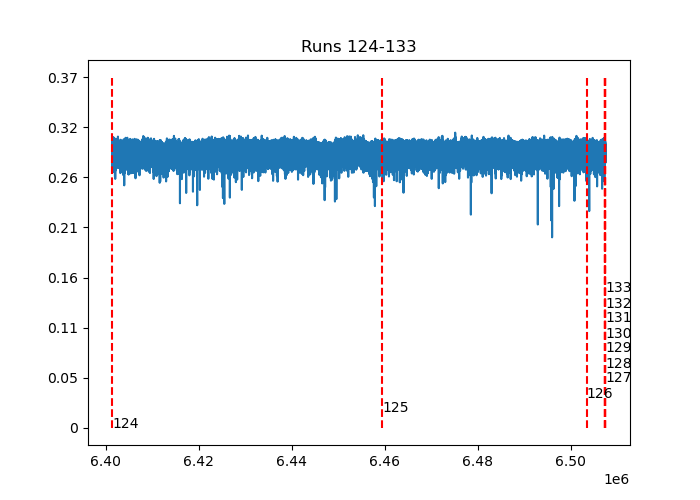

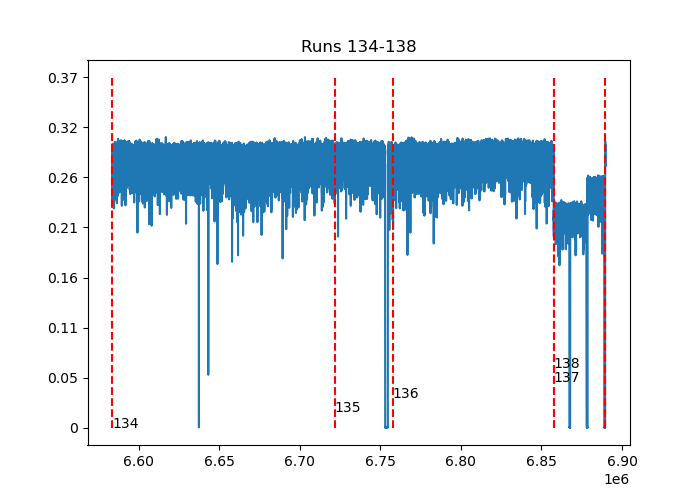

In [17]:
for index, shot in enumerate(shots_bins):
    #print (shot)
    plt.figure(figsize=(7,5))
    plt.title('Runs {}-{}'.format(runlist_bins[index][0], runlist_bins[index][-1]))
    xaxis = np.arange(shot[0], shot[-1])
    yaxis = np.arange(0,8)
    plt.yticks([0, 1, 2, 3, 4, 5, 6, 7], [0, 0.05, 0.11, 0.16, 0.21, 0.26, 0.32, 0.37])
    plt.plot(xaxis, ch_all[shot[0]:shot[-1]])
    plt.vlines(x=shot, ymin=0, ymax=7, linestyles='dashed', color = 'red')
    for idx, run in enumerate(runlist_bins[index]):
        #print (j)
        plt.text(x=shot[idx], y=0.3*idx, s=run)
    #plt.show()
    plt.savefig('/sf/alvra/data/p21961/work/emma/Reduced_data/Fig_range_{:03d}_{:03d}.PNG'.format(runlist_bins[index][0], runlist_bins[index][-1]))

In [ ]:
pgroup = 'p22251'
run = 26
acq = 25
pp = False

channels = [channel_diode_1, channel_diode_2, channel_PSSS_center, channel_Izero110]
########################################################################################################
jsonfile = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, run))[0]
channel_list = [channel_Events] + channels
scan = SFScanInfo(jsonfile)
data = scan[acq-1]
print (data)
resultsPP, results, _, _ = load_data_compact_pump_probe(channel_list, channel_list, data)
data.close()


In [ ]:
diode1 = results[channel_diode_1]
diode2 = results[channel_diode_2]
psss   = results[channel_PSSS_center]
Izero  = results[channel_Izero110]

if pp:
    diode1 = resultsPP[channel_diode_1].pump
    diode2 = resultsPP[channel_diode_2].pump
    psss   = resultsPP[channel_PSSS_center].pump
    Izero  = resultsPP[channel_Izero110].pump

## check backlog

Run 106: 19 acquisitions found


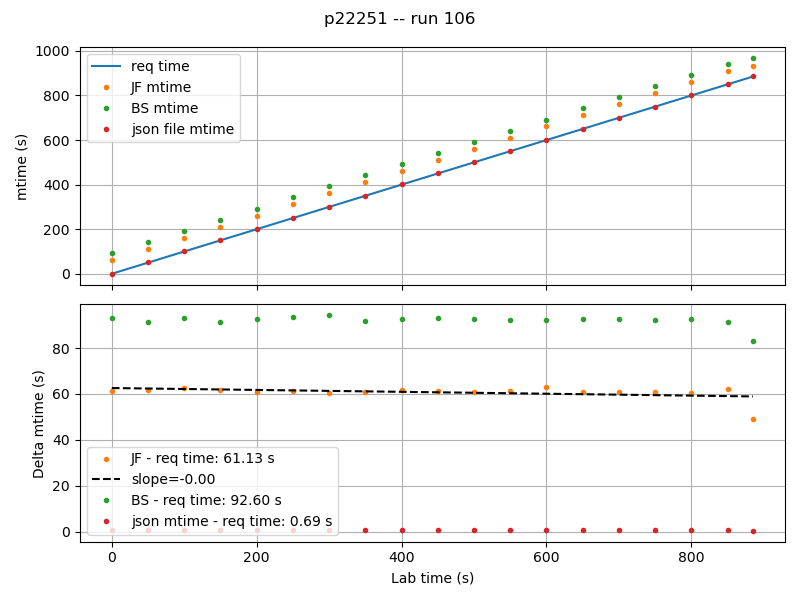

In [2]:
##### 16M test #####
#detector = 'JF06T32V04'
#run = 14
#pgroup = 'p21997'

##### 4M  #####
detector = 'JF06T08V07'
run = 106
pgroup = 'p22251'

###########################################################################
reqtime, JF, BS, json,_ = check_JF_backlog(detector, pgroup, run)
plot_JF_backlog(reqtime, JF, BS, json, pgroup, run)

Run 220: 3 acquisitions found
Acq 1 not ready yet or no JF file present
Acq 2 not ready yet or no JF file present
Acq 3 not ready yet or no JF file present
Run 221: 18 acquisitions found
Run 222: 19 acquisitions found
Run 223: 9 acquisitions found
Run 224: 3 acquisitions found
Acq 1 not ready yet or no JF file present
Acq 2 not ready yet or no JF file present
Acq 3 not ready yet or no JF file present
Run 225: 3 acquisitions found
Acq 1 not ready yet or no JF file present
Acq 2 not ready yet or no JF file present
Acq 3 not ready yet or no JF file present


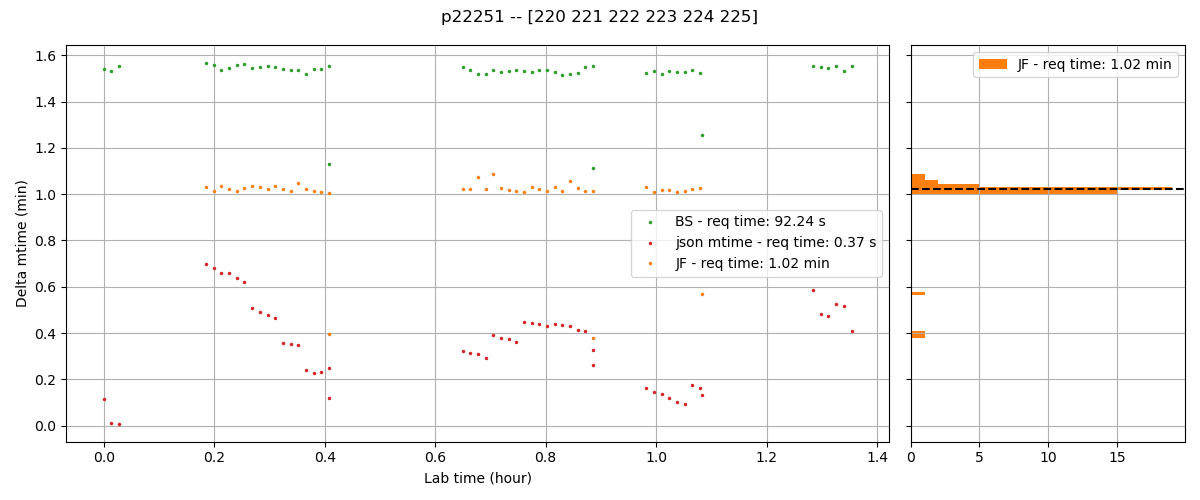

In [11]:
pgroup = 'p22251'
detector = 'JF06T08V07'
runlist = np.arange(220, 226, 1)

reqtime, JFonly, BSonly, jsononly, trun = check_JF_backlog_loop(detector, pgroup, runlist)
plot_JF_backlog_loop(reqtime, trun, JFonly, BSonly, jsononly, pgroup, runlist)

## PSSS vs time

In [2]:
pgroup = 'p22251'
runlist = np.arange(54, 58, 1)
timestamps, psss_com, pulseEnergy = check_psss(pgroup, runlist)

4/4: /sf/alvra/data/p22251/raw/run0057-SiN_12keV_13fs/meta/scan.json
Step 5 of 5: Processing acq0005

--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet            5001 / 5001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARFE10-PBPG050:HAMP-INTENSITY-CAL 5001 / 5001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARFE10-PSSS059:FIT-COM            4919 / 5001 -> 2% loss ▇▇▇▇▇▇▇▇▇

over the whole data set: 4919 / 5001 -> 2% loss
complete channels: 2 / 3 -> 33% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 100.0 Hz


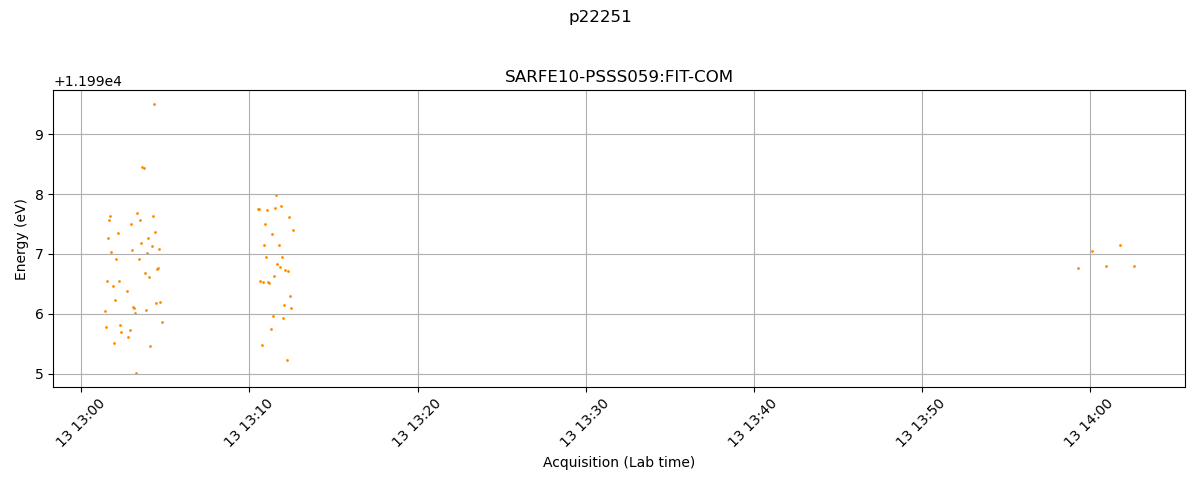

In [3]:
fig = plt.figure(figsize = (12,5))
plt.suptitle(pgroup)

ax1 = fig.add_subplot(111)
#ax2 = plt.twinx(ax1)
ax1.set_title('SARFE10-PSSS059:FIT-COM')

ax1.scatter(timestamps, psss_com, color = 'darkorange', s=1)
#ax2.scatter(timestamps, pulseEnergy, s=1)

ax1.tick_params('x', labelrotation=45)
ax1.set_ylabel('Energy (eV)')
#ax2.set_ylabel('Pulse energy (uJ)')
ax1.set_xlabel('Acquisition (Lab time)')
#ax1.set_ylim(12020, 12060)

ax1.grid()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()